# Numerical Integration

Here we will study numerical integration in Python as provided by routines in `scipy.integrate`. The main routine is `quad` or `quad_vec`, but there are many other methods implemented that are useful in some circumstances.

## Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.optimize as opt
import scipy.interpolate as interp
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Documentation

As always we should check the documentation. There are routines for Newton-Cotes integration, `newton_cotes`, for integrating functions, in particular `quad`, and `quad_vec`, and for integrating from tabulated values, in particular `cumtrapz`, `simps`, and `romb`. We should check the documentation for all of these and some of them will be used in the prelab, lab, and homework. Here we will only look at a few of them.

(Note that functions do get deprecated! The function `romberg` was removed from scipy version 1.15!)

In [3]:
integ?

Type:        module
String form: <module 'scipy.integrate' from 'c:\\Users\\sophi\\anaconda3\\Lib\\site-packages\\scipy\\integrate\\__init__.py'>
File:        c:\users\sophi\anaconda3\lib\site-packages\scipy\integrate\__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   qmc_qu

In [4]:
integ.newton_cotes?

Signature: integ.newton_cotes(rn, equal=0)
Docstring:
Return weights and error coefficient for Newton-Cotes integration.

Suppose we have (N+1) samples of f at the positions
x_0, x_1, ..., x_N. Then an N-point Newton-Cotes formula for the
integral between x_0 and x_N is:

:math:`\int_{x_0}^{x_N} f(x)dx = \Delta x \sum_{i=0}^{N} a_i f(x_i)
+ B_N (\Delta x)^{N+2} f^{N+1} (\xi)`

where :math:`\xi \in [x_0,x_N]`
and :math:`\Delta x = \frac{x_N-x_0}{N}` is the average samples spacing.

If the samples are equally-spaced and N is even, then the error
term is :math:`B_N (\Delta x)^{N+3} f^{N+2}(\xi)`.

Parameters
----------
rn : int
    The integer order for equally-spaced data or the relative positions of
    the samples with the first sample at 0 and the last at N, where N+1 is
    the length of `rn`. N is the order of the Newton-Cotes integration.
equal : int, optional
    Set to 1 to enforce equally spaced data.

Returns
-------
an : ndarray
    1-D array of weights to apply to the functio

In [5]:
print("n=1: [trapezoidal rule] ", integ.newton_cotes(1))
print("n=2: [Simpson's rule] ", integ.newton_cotes(2))
print("n=10: ", integ.newton_cotes(10))

n=1: [trapezoidal rule]  (array([0.5, 0.5]), -0.08333333333333333)
n=2: [Simpson's rule]  (array([0.33333333, 1.33333333, 0.33333333]), -0.011111111111111112)
n=10:  (array([ 0.26834148,  1.77535941, -0.81043571,  4.54946288, -4.35155123,
        7.1376463 , -4.35155123,  4.54946288, -0.81043571,  1.77535941,
        0.26834148]), -0.004118303556134244)


In [6]:
integ.trapezoid?

Signature: integ.trapezoid(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

If `x` is provided, the integration happens in sequence along its
elements - they are not sorted.

Integrate `y` (`x`) along each 1d slice on the given axis, compute
:math:`\int y(x) dx`.
When `x` is specified, this integrates along the parametric curve,
computing :math:`\int_t y(t) dt =
\int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapezoid : float or ndarray
    Definite integral of `y` = n-dimensional array as approximate

In [7]:
integ.cumulative_trapezoid?

Signature: integ.cumulative_trapezoid(y, x=None, dx=1.0, axis=-1, initial=None)
Docstring:
Cumulatively integrate y(x) using the composite trapezoidal rule.

Parameters
----------
y : array_like
    Values to integrate.
x : array_like, optional
    The coordinate to integrate along. If None (default), use spacing `dx`
    between consecutive elements in `y`.
dx : float, optional
    Spacing between elements of `y`. Only used if `x` is None.
axis : int, optional
    Specifies the axis to cumulate. Default is -1 (last axis).
initial : scalar, optional
    If given, insert this value at the beginning of the returned result.
    0 or None are the only values accepted. Default is None, which means
    `res` has one element less than `y` along the axis of integration.

    .. deprecated:: 1.12.0
        The option for non-zero inputs for `initial` will be deprecated in
        SciPy 1.15.0. After this time, a ValueError will be raised if
        `initial` is not None or 0.

Returns
-------
r

In [8]:
integ.romberg?

Signature:
integ.romberg(
    function,
    a,
    b,
    args=(),
    tol=1.48e-08,
    rtol=1.48e-08,
    show=False,
    divmax=10,
    vec_func=False,
)
Docstring:
Romberg integration of a callable function or method.

.. deprecated:: 1.12.0

      This function is deprecated as of SciPy 1.12.0 and will be removed
      in SciPy 1.15.0. Please use `scipy.integrate.quad` instead.

Returns the integral of `function` (a function of one variable)
over the interval (`a`, `b`).

If `show` is 1, the triangular array of the intermediate results
will be printed. If `vec_func` is True (default is False), then
`function` is assumed to support vector arguments.

Parameters
----------
function : callable
    Function to be integrated.
a : float
    Lower limit of integration.
b : float
    Upper limit of integration.

Returns
-------
results : float
    Result of the integration.

Other Parameters
----------------
args : tuple, optional
    Extra arguments to pass to function. Each element of `

In [9]:
integ.romb?

Signature: integ.romb(y, dx=1.0, axis=-1, show=False)
Docstring:
Romberg integration using samples of a function.

Parameters
----------
y : array_like
    A vector of ``2**k + 1`` equally-spaced samples of a function.
dx : float, optional
    The sample spacing. Default is 1.
axis : int, optional
    The axis along which to integrate. Default is -1 (last axis).
show : bool, optional
    When `y` is a single 1-D array, then if this argument is True
    print the table showing Richardson extrapolation from the
    samples. Default is False.

Returns
-------
romb : ndarray
    The integrated result for `axis`.

See Also
--------
quad : adaptive quadrature using QUADPACK
romberg : adaptive Romberg quadrature
quadrature : adaptive Gaussian quadrature
fixed_quad : fixed-order Gaussian quadrature
dblquad : double integrals
tplquad : triple integrals
simpson : integrators for sampled data
cumulative_trapezoid : cumulative integration for sampled data
ode : ODE integrators
odeint : ODE integra

In [10]:
integ.quad?

Signature:
integ.quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowL

The work horse routine is `quad`. It is actually a wrapper for many integration routines and techniques. In fact, it has so many features that historically it required its own function to explain some of its more esoteric features, `quad_explain`! All the documentation is now included in `quad` itself so this extra function no longer exists (it is another function that has been removed from scipy).

Finally, there is a version of `quad` than can handle vectorized functions, `quad_vec`. This is a function that can compute multiple integrals over the same interval all at once. It is a relatively new function so is not as commonly used. A more common way to handle repeated evaluation of integrals is to use a loop. We will explore both options here.

In [11]:
integ.quad_vec?

Signature:
integ.quad_vec(
    f,
    a,
    b,
    epsabs=1e-200,
    epsrel=1e-08,
    norm='2',
    cache_size=100000000.0,
    limit=10000,
    workers=1,
    points=None,
    quadrature=None,
    full_output=False,
    *,
    args=(),
)
Docstring:
Adaptive integration of a vector-valued function.

Parameters
----------
f : callable
    Vector-valued function f(x) to integrate.
a : float
    Initial point.
b : float
    Final point.
epsabs : float, optional
    Absolute tolerance.
epsrel : float, optional
    Relative tolerance.
norm : {'max', '2'}, optional
    Vector norm to use for error estimation.
cache_size : int, optional
    Number of bytes to use for memoization.
limit : float or int, optional
    An upper bound on the number of subintervals used in the adaptive
    algorithm.
workers : int or map-like callable, optional
    If `workers` is an integer, part of the computation is done in
    parallel subdivided to this many tasks (using
    :class:`python:multiprocessing.po

## Using `quad`

Both `quad` and `quad_vec` are based on the same ideas so we will discuss the basics in terms of `quad`.

### General usage

To get started using it let us consider a simple integral,
$$ \int_0^2 \mathrm{e}^x \,\mathrm{d}x = \mathrm{e}^2 - 1. $$
We can perform this integral using `quad` as shown below.

In [12]:
integ.quad(np.exp, 0, 2)

(6.3890560989306495, 7.093277186654589e-14)

Notice that `quad` **returns two quantities.** As described in the documentation these are the value of the integral and an estimate of the error in the integral. Note that this error estimate is based on the convergence of the integration algorithm, it is **not** the true error. If `quad` knew the true value it would return it and the error would be zero!

In principle we should always check the error estimate as this is an indication of the convergence of the algorithm and how much we should trust the result. Since `quad` returns the results in what is a called a `tuple` in Python, we can store the results using
```python
(res, err) = integ.quad(np.exp, 0, 2)
```
or also commonly written as
```python
res, err = integ.quad(np.exp, 0, 2)
```

Alternatively we can entirely ignore the error. This is not good practice, but is often expedient (that is, once we know the integral converges we can start ignoring the error). Another common idiom is thus to just pull out the result by extracting the first element of the `tuple` (the element with index 0),
```python
res = integ.quad(np.exp, 0, 2)[0]
```

For our simple case we have ...

In [13]:
res_true = np.exp(2) - 1
res, err = integ.quad(np.exp, 0, 2)
print(f"True value of integral = {res_true} quad estimate of integral = {res}")
print(f"True error in integral = {np.abs(res_true-res)} quad estimate of error = {err}")

True value of integral = 6.38905609893065 quad estimate of integral = 6.3890560989306495
True error in integral = 8.881784197001252e-16 quad estimate of error = 7.093277186654589e-14


### Getting more information

We can get detailed information of what `quad` is doing by using `full_output=True`.

In [14]:
integ.quad(np.exp, 0, 2, full_output=True)

(6.3890560989306495,
 7.093277186654589e-14,
 {'neval': 21,
  'last': 1,
  'iord': array([      1, 6029375, 3801187, 5570652, 6619251, 7536754, 7536732,
         7340143, 6881384, 6357084, 6357102, 7274595, 6553710, 3342433,
         4980828, 6422633, 7536732, 7602281, 2949221, 6357104, 7012451,
         6750305, 7536741, 7536732, 6881379, 7929968, 6488156, 7209071,
         7602291, 7209057, 7536756, 6226012, 7340127, 6488185, 6488161,
         6619240, 6226015, 6226012, 7274595, 6357092, 6357108, 6488110,
         7929968, 6815860, 7209071, 3342381, 3211313, 7340078, 6488185,
               0], dtype=int32),
  'alist': array([0.00000000e+000, 9.13188674e-312, 0.00000000e+000, 6.95262390e-310,
         2.27270197e-322, 9.13260046e-312, 9.13260046e-312, 9.13260045e-312,
         9.13260038e-312, 9.13260046e-312, 9.13260038e-312, 9.13260038e-312,
         9.13260046e-312, 9.13260038e-312, 9.13260045e-312, 9.13260046e-312,
         9.13260038e-312, 9.13260045e-312, 9.13260038e-312, 9.132

This returns a lot of extra information in a data structure called a `dictionary` in Python. (This is called an associative array, hash map, or something similar in other languages.) It is best to store this and look at it more closely. The full details are contained in the documentation. We will focus on only one entry, the number of function evaluations required which is contained in `neval`.

In [15]:
(res, err, info) = integ.quad(np.exp, 0, 2, full_output=True)
print(f"Evaluation of the integral required {info['neval']} function evaluations")

Evaluation of the integral required 21 function evaluations


The entries in the dictionary are accessed by keys.
We can get a list of all the keys from the dictionary itself.

In [16]:
info.keys()

dict_keys(['neval', 'last', 'iord', 'alist', 'blist', 'rlist', 'elist'])

### Complex function

A complex valued function can also be integrated.

Consider
$$ \int_{0}^{\pi} \mathrm{e}^{\mathrm{i} \theta} \mathrm{d}\theta = \left. \frac{1}{\mathrm{i}} \mathrm{e}^{\mathrm{i} \theta} \right|_{0}^{\pi} = 2 \mathrm{i}. $$

In [17]:
def complexf(theta):
    return np.exp(1j * theta)

# We must tell quad to expect a complex valued function
integ.quad(complexf, 0, np.pi, complex_func=True)

((3.6775933888827275e-17+2j), (2.2102239425853306e-14+2.220446049250313e-14j))

Notice that now the returned value and the estimated error are both returned as complex numbers.
Here `quad` is splitting the function into its real and imaginary parts and thus is performing two real integrals.
In general we can always write
$$ f(x) = f_r(x) + \mathrm{i} f_i(x), $$
where $f_r(x)$ and $f_i(x)$ are both real valued functions.
These two functions can now be integrated "in the usual way".

For our case using Euler's identity we know that
$$ \mathrm{e}^{\mathrm{i} \theta} = \cos\theta + \mathrm{i} \sin\theta. $$
Thus the integral from above can also be written as
$$ \int_{0}^{\pi} \mathrm{e}^{\mathrm{i} \theta} \mathrm{d}\theta = \int_{0}^{\pi} \cos\theta \, \mathrm{d}\theta + \mathrm{i} \int_{0}^{\pi} \sin\theta \, \mathrm{d}\theta. $$
We can verify that this is what `quad` is doing.
Notice the values and the errors are *exactly* that same as found above.

In [18]:
print(f"Real part:", integ.quad(np.cos, 0, np.pi))
print(f"Imag part:", integ.quad(np.sin, 0, np.pi))

Real part: (3.6775933888827275e-17, 2.2102239425853306e-14)
Imag part: (2.0, 2.220446049250313e-14)


## Using `quad_vec`

Although the name suggests that `quad_vec` is the same as `quad`, but just works on a vector valued function, it actually has some differences.
It does not have all the same options and features as `quad` so it is *not just a drop-in replacement* and does not evaluate the integral in exactly the same way (as we will see further below).

To get an idea of its usage consider the integral
$$ I \equiv \int_{0}^{\pi} \sin(n\theta) \mathrm{d}\theta = \begin{cases} 0, & n \hbox{ even} \\ \frac{2}{n}, & n \hbox{ odd} \end{cases}. $$

Suppose we want to evaluate this for $n \in \{0, 1, \ldots, 10\}$.
One way to proceed is to write a loop.
We will discuss that below.
The alternative is to use `quad_vec`.
Here `n` is an *extra argument* to the function, so we pass it in as usual, right?

In [19]:
def f(theta, n):
    return np.sin(n * theta)
    
n = np.arange(0, 10+1)
integ.quad_vec(f, 0, np.pi, args=(n))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We got an error.
What happened?
Do we understand it?

This is one of the more obscure errors we will encounter that is not obvious.
Briefly, this comes us since writing `(n)` is ambiguous.
We want this to represent a tuple, but we also use parentheses to separate terms in a mathematical equation and it is fine to include redundant parentheses as they will just be ignored.
How is the computer supposed to know which one we meant here?
The code at the beginning of the `richardson_center` function from last week handled this case.
Some functions in scipy also correctly handle this, others do not.
(Actually, it is not this simple. Exactly how we test `args` affects the cases it can handle correctly and those it cannot. The code here *would* catch some uses, but not the one we have done. The code in `richardson_center` would also have a problem with uses like the one we have here, and would lead to a different and perhaps equally confusing error.)

We will see this again soon and you will be "reminded" of the issue and it will be discussed in a bit more detail.
For now the most common fix is to write `(n,)`: the extra comma makes it clear we mean "create a tuple".

In [20]:
res_quad, err_quad = integ.quad_vec(f, 0, np.pi, args=(n,))
# And here is some further foreshadowing of things we will see and understand ....
res_true = np.zeros_like(res_quad)
res_true[n%2 == 1] = 2/n[n%2 == 1]
print("Absolute errors:", np.abs(res_true - res_quad))

Absolute errors: [0.00000000e+00 4.44089210e-16 0.00000000e+00 1.11022302e-16
 1.11022302e-16 5.55111512e-17 3.33066907e-16 1.11022302e-16
 3.42421660e-17 1.66533454e-16 5.55111512e-17]


## Incandescent Light Bulb

The great invention of Edison that brought safe, controllable light to the world has now largely been relegated to the dustbin of history due to its energy inefficiency. Here we will study this through a simple model. We treat the light bulb as a black body. This is a simple approximation that describes many of the features of a light bulb, but is not a complete model. The intensity of a black body, the energy emitted per unit time in some solid angle as a function of the wavelength of the emitted light, is
$$ I(\lambda) = \frac{2\pi A h c^2}{\lambda^5 (\mathrm{e}^{h c/\lambda k_B T} - 1)}, $$
where $A$ is the surface area of the black body, $h=6.626\times10^{-34}\;\mathrm{J/s}$ is Planck's constant, $c$ is the speed of light, $k_B=1.381\times10^{-23}\;\mathrm{J/K}$ is Boltzmann's constant, and $T$ is the temperature of the object.

A black body at any temperature emits at all wavelengths. Our eye is only sensitive to "visible light", that is, wavelengths roughly in the range $300\le\lambda(\mathrm{nm})\le 750$. Any radiation emitted at smaller or larger frequencies is thus "wasted energy" as far as we are concerned. For this reason let us define the efficiency, $\eta$, as the ratio of the emitted radiation we can observe to the total emitted radiation
$$ \eta \equiv \frac{\int_{\lambda_1}^{\lambda_2} I(\lambda) \mathrm{d}\lambda}{\int_0^\infty I(\lambda) \mathrm{d}\lambda}. $$

To use these we transform it into a simpler form. Let $x_i(T) \equiv \frac{h c}{\lambda_i k_B T}$ and note that we can perform the integral in the denominator leaving the efficiency as
$$ \eta(T)  = \frac{15}{\pi^4} \int_{x_2(T)}^{x_1(T)} \frac{x^3}{\mathrm{e}^x-1} \mathrm{d}x. $$
We will use $\lambda_1=300\;\mathrm{nm}$ and $\lambda_2=750\;\mathrm{nm}$ in what follows to estimate the efficiency of a light bulb for visible radiation.

### Loops

We wish to find the temperature at which the light bulb runs at maximum efficiency. To do this we need to evaluate the efficiency for a grid of temperatures. Unfortunately `quad` does not evaluate the integral over an array of end points so we must resort to writing a loop. Alternatively we could use `quad_vec`, we will explore that below.

The general structure for a loop in Python is
```python
for var in list:
    do something
    do something ...
```    

Here the `list` is any sort of object that can be iterated. For our purposes we are going to use a list of array index values. We will use the function `range` to construct them.

### Optimal Temperature

To calculate the optimal temperature we construct a grid of temperature values and loop over them.

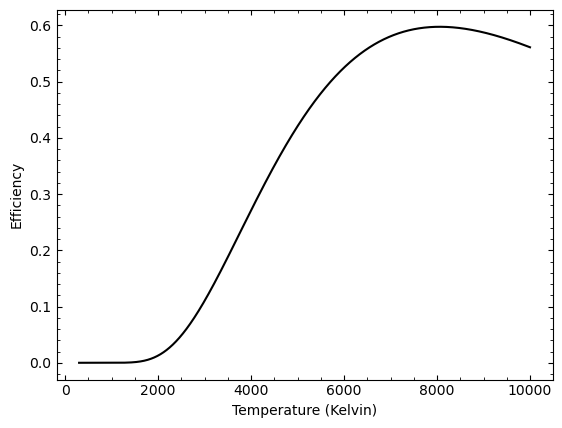

In [21]:
# Some constants to get us going.
# We will use the temperature measured in Kelvin.
Planckh = 6.62606957e-34  # J s, Planck's constant
speedc = 2.99792458e+08  # m/s, speed of light
kB = 1.3806488e-23  # J/K, Boltzmann's constant
lam1 = 300e-9  # m
lam2 = 750e-9  # m
# Conversion factors need for the efficiency.
x1T = Planckh * speedc / (lam1 * kB)  # x1*T, in K
x2T = Planckh * speedc / (lam2 * kB)  # x2*T, in K

def Intensity(x):
    """Blackbody intensity in dimensionless form."""
    return x**3 / (np.exp(x) - 1)

def efficiency(T):
    """Efficiency of a blackbody.
    This is defined as the intensity emitted in visible wavelengths normalized
    by the total intensity of a blackbody with temperature, T, specified in Kelvin.
    """
    return 15 / np.pi**4 * integ.quad(Intensity, x2T / T, x1T / T)[0]

TKelvin = np.linspace(300, 10000, 5000)  # Kelvin
eta = np.zeros_like(TKelvin)
for j in range(len(TKelvin)):
    eta[j] = efficiency(TKelvin[j])

# A more pythonic way of doing this is to NOT preallocate and instead use list comprehension.
# List comprehension is "optimized" for creating arrays so is not such a bad way to do SIMPLE manipulations.
# If we were doing more work inside the loop then list comprehension is not a good approach.
# It is not something I am going to say much about as we are going to do our best to avoid using loops.
# However, you will see many, many examples of it when you search online.
# eta = [efficiency(T) for T in TKelvin]
# Note that this create a python list, not a numpy array!
# Most numpy and scipy functions will convert a list to an array for you, but we can run into problems when
# we are not careful.
# Thus, maybe we would want to do the conversion ourselves, either by wrapping the above list or as follows
# eta = np.array(eta)

# A quick plot to see what it looks like
plt.plot(TKelvin, eta, 'k-')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Efficiency');

We can now start to analyze this efficiency. Before doing that, let us consider using `quad_vec` for this problem.

### `quad_vec`

As shown in the documentation, this works on a vectorized function, though it requires the same limits of integration for all integrals we evaluate. Unfortunately, we want to evaluate the integral at multiple temperatures and our simplification above moved the temperature into the limits of integration. To fix this let us go back to the original integral. We had defined the efficiency as the ratio of intensities,
$$ \eta \equiv \frac{\int_{\lambda_1}^{\lambda_2} I(\lambda) \mathrm{d}\lambda}{\int_0^\infty I(\lambda) \mathrm{d}\lambda}, $$
where the intensity was given by
$$ I(\lambda) = \frac{2\pi A h c^2}{\lambda^5 (\mathrm{e}^{h c/\lambda k_B T} - 1)}.$$

To simplify this in a similar way as above, let
$$ y \equiv \frac{h c}{\lambda k_B}. $$
With this we can show that
$$ \eta(T) = \frac{15}{\pi^4 T^4} \int_{y_2}^{y_1} \frac{y^3}{\mathrm{e}^{y/T} - 1} \mathrm{d}y. $$
Notice that $y_1$ is what we called `x1T` and $y_2$ is what we called `x2T` in the code above.

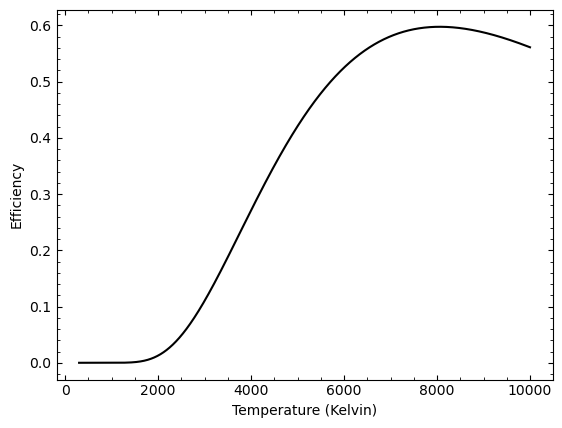

In [22]:
def Intensity_vec(y, T):
    """Blackbody intensity in dimensionless form.
    T is an array of temperatures in Kelvin.
    """
    return y**3 / (np.exp(y / T) - 1)

def efficiency_vec(T):
    """Efficiency of a blackbody.
    This is defined as the intensity emitted in visible wavelengths normalized
    by the total intensity of a blackbody with temperature, T, specified in Kelvin.
    Here T is an array of temperatures.
    workers is an optional argument passed to quad_vec. It determines the number of processes
    to run in parallel for the computation.
    """
    return 15 / (np.pi * T)**4 * integ.quad_vec(Intensity_vec, x2T, x1T, args=(T,))[0]

eta_vec = efficiency_vec(TKelvin)

# A quick plot to see what it looks like
plt.plot(TKelvin, eta_vec, 'k-')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Efficiency');

The plots look very similar, lets compare the values. Since we do not know which one is the correct value we will calculate the error as the absolute value of the difference divided by the average
$$ \epsilon \equiv 2 \left| \frac{\eta_1 - \eta_2}{\eta_1 + \eta_2} \right| . $$

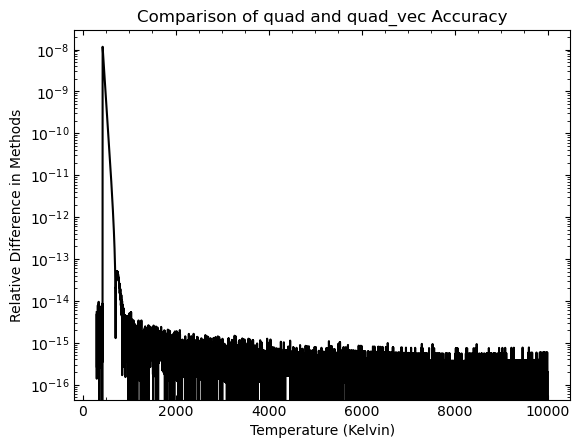

In [23]:
epsilon = 2 * np.abs((eta - eta_vec) / (eta + eta_vec))
plt.semilogy(TKelvin, epsilon, 'k-')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Relative Difference in Methods')
plt.title('Comparison of quad and quad_vec Accuracy');

We can also compare how long it takes to perform each computation. We will use the cell magic `%%timeit` for this purpose.
(We have seen this cell magic again in the past and will encounter it again in the future.)

Here is the loop.

In [24]:
%%timeit
eta = np.zeros_like(TKelvin)
for j in range(len(TKelvin)):
    eta[j] = efficiency(TKelvin[j])

96.4 ms ± 853 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Here is the pythonic "list comprehension" approach.

In [25]:
%%timeit
eta = np.array([efficiency(T) for T in TKelvin])

95.5 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Here is the vectorized version.

In [26]:
%%timeit
eta_vec = efficiency_vec(TKelvin)

4.4 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We see that `quad_vec` is noticeably more efficient!

### Back to Optimal Temperature

From the quick plots of the efficiency we see it always remains below 60 percent and is a maximum at a rather high temperature. We can find this maximum in a number of ways. One approach is to find where the derivative is zero. We can do this using a spline and a root finder.

(As we saw above, it does not matter whether we use the result from `quad` or `quad_vec` for this analysis.)

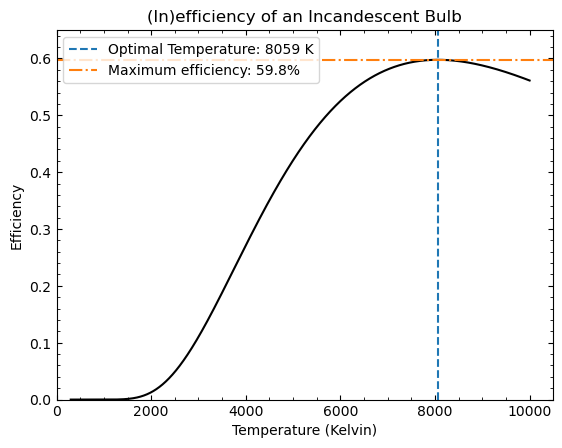

In [27]:
eta_spline = interp.make_interp_spline(TKelvin, eta)
# Calculate its derivative as a function
eta_spline_deriv = eta_spline.derivative()
Toptimal = opt.brentq(eta_spline_deriv, 4000, 9000)
etamax = efficiency(Toptimal)
# Make a nice plot of the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(TKelvin, eta, 'k-')
ax.axvline(Toptimal, color='C0', ls='--',
            label=f'Optimal Temperature: {Toptimal:.0f} K')
ax.axhline(etamax, color='C1', ls='-.',
            label=f'Maximum efficiency: {100*etamax:.1f}%')
ax.legend(loc='best')
ax.set_xlabel('Temperature (Kelvin)')
ax.set_ylabel('Efficiency')
ax.set_title('(In)efficiency of an Incandescent Bulb')
ax.set_xlim(left=0)
ax.set_ylim(0, 0.65);

The optimal temperature is quite high and the value is not too surprising. The Sun is the dominant source of light on the Earth and it can also be approximated as a black body. The surface temperature of the Sun is approximately 5800 K, close to the optimal temperature we find. The exact connection between the two and the role evolution plays in this is more subtle and must be addressed with some care. Further, we could easily include a "response function" for how the eye responds as a function of wavelength in our analysis. See <a href="http://www.phys.ufl.edu/~hagen/phz4710/readings/AJPSofferLynch.pdf">Soffer and Lynch (1999)</a> for more details on these and related issues. This would be a more accurate assessment. Even without that we get the main point: the optimal temperature for operating an incandescent bulb is quite high and the peak efficiency is not all that high.

Overall we see that an incandescent bulb is incredibly inefficient, do we really want to run such a bulb at approximately 8000 K! Even if we did we would only be running at about 60 percent efficiency. Of course this analysis should not be taken too literally. Many things can be/were done to improve the efficiency, an incandescent bulb is not a perfect blackbody, *etc*. Even so, it shows how big a problem must be overcome to make them even marginally efficient. Alternate technologies have thus supplanted the venerable incandescent bulb.